# UNIVERSIDAD SANTO TOMÁS
## Facultad de Ingeniería Electrónica
### Machine Learning en Visión Artificial

Regresión logística y clasificación

Prerequisitos:
* sklearn

Importar librerías en general

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

### Importando el dataset

De la librería *sklearn*, importar el dataset de cáncer de mama.

In [2]:
from sklearn.datasets import load_breast_cancer

Descargar el dataset y guardarlo en variables locales (la descarga sólo se hace la primera vez):

In [3]:
cancer_dataset = load_breast_cancer()

*cancer_dataset* es un diccionario, a continuación las llaves que lo componen:

In [4]:
print(cancer_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


## Datos de Entrenamiento

### Entradas $X$

Los datos de *data* corresponden a las entradas del dataset, $X$, y se almacenan en un arreglo de *numpy*.

In [5]:
X = cancer_dataset.data
print(type(X))

<class 'numpy.ndarray'>


$X$ tiene 569 registros, cada uno con 30 características:

In [6]:
print( f'X.shape = {X.shape}' )

X.shape = (569, 30)


Cada característica corresponde a un número decimal, por ejemplo el quinto registro:

In [7]:
print(X[4])

[2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
 1.043e-01 1.809e-01 5.883e-02 7.572e-01 7.813e-01 5.438e+00 9.444e+01
 1.149e-02 2.461e-02 5.688e-02 1.885e-02 1.756e-02 5.115e-03 2.254e+01
 1.667e+01 1.522e+02 1.575e+03 1.374e-01 2.050e-01 4.000e-01 1.625e-01
 2.364e-01 7.678e-02]


El dataset incluye una descripción de cada una de las características:

In [8]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Objetivos $Y$

Cada muestra de $X$ tiene un correspondiente valor en $Y$, en este caso, la clase:

In [9]:
Y = cancer_dataset.target
print(f'Y.shape={Y.shape}')

Y.shape=(569,)


El quinto registro corresponde a *no cancer*:

In [10]:
print(f'Y[4]={Y[4]}')

Y[4]=0


### Centrado y escalizado de los datos

Cálculo del promedio

In [11]:
X_med = np.mean(X, axis=0)
print(f'X_med={X_med}')

X_med=[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]


Resta del promedio:

In [12]:
X = X - X_med
print(f'X.shape={X.shape}')

X.shape=(569, 30)


Cálculo de la desviación estándar:

In [13]:
X_std = np.std(X, axis=0)
print(f'X_std={X_std}')

X_std=[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


Normalización:

In [14]:
X = X/X_std
print(f'X.shape={X.shape}')

X.shape=(569, 30)


Agregando unos para el *bias*:

In [15]:
X = np.append( np.ones((X.shape[0],1)), X, axis=1)
print(f'X.shape={X.shape}')

X.shape=(569, 31)


### División del Dataset

In [16]:
import random

Mezclando el dataset

In [17]:
c = list(zip(X, Y))
X_, Y_= zip(*c)

In [18]:
X_ = np.array(X_)
Y_ = np.array(Y_)

70% para train y 30% para test

In [19]:
train_size = int(X.shape[0]*0.7)
Xtrain = X_[:train_size]
Ytrain = Y_[:train_size]
Xtest = X_[train_size:]
Ytest = Y_[train_size:]

In [20]:
print(f'Xtrain.shape={Xtrain.shape}')
print(f'Ytrain.shape={Ytrain.shape}')
print(f'Xtest.shape={Xtest.shape}')
print(f'Ytest.shape={Ytest.shape}')

Xtrain.shape=(398, 31)
Ytrain.shape=(398,)
Xtest.shape=(171, 31)
Ytest.shape=(171,)


### Hipótesis:

$$z(x)=Wx$$

$$y'=h_W(x)=\frac{1}{1+e^{-z(x)}}$$

In [21]:
class H:
    def __init__(self, D):
        self.D = D
        self.W = np.random.rand(self.D)
        
    def __call__(self, x):
        z = np.sum( self.W * x )
        return 1/(1+np.exp(-z))
    
    def reset(self):
        self.W = np.random.rand(self.D)

In [22]:
m = X.shape[0]
D = X.shape[1]
h = H(D)

Predicción:

In [23]:
def predict(X):
    y_ = np.array([h(x) for x in X])
    return y_

In [24]:
def tlog(X):
    return np.clip(np.log(X), a_min=-1000, a_max=0)

def calc_loss(X, Y):
    J = (-1/m)*np.sum( Y*tlog(predict(X))+(1-Y)*tlog(1-predict(X)) )
    return J

Cálculo de gradiente:

In [25]:
def calc_gradient(X, Y):
    dJ = np.zeros(D)
    errors = predict(X)-Y
    for d in range(D):
        dJ[d] = (1/m)*sum(errors*X[:,d])
    return dJ

In [26]:
calc_gradient(Xtrain, Ytrain)

array([-0.08000059,  0.45693817,  0.31253525,  0.47046555,  0.4438822 ,
        0.28236862,  0.47582711,  0.50620543,  0.53787958,  0.2791475 ,
        0.09712149,  0.38192469,  0.04306257,  0.38211   ,  0.35457454,
        0.01262398,  0.30599176,  0.25886185,  0.33983784,  0.04158223,
        0.16862539,  0.49511442,  0.33556396,  0.50393776,  0.46808961,
        0.31754378,  0.46033965,  0.4854196 ,  0.5534296 ,  0.31424132,
        0.30517502])

### Métricas

Matriz de confusión:

In [27]:
def conf_matriz(y_, y, th):
    yth_ = y_>th
    yth = y>0.5
    tp = np.sum( np.logical_and(yth, yth_) )
    tn = np.sum( np.logical_not( np.logical_or(yth, yth_) ) )
    xor = np.logical_xor(yth, yth_)
    fn = np.sum( np.logical_and(xor, yth) )
    fp = np.sum( np.logical_and(xor, yth_) )
    return tp, fp, fn, tn

F1 Score:

In [28]:
def f1_score(y_, y):
    tp, fp, fn, tn = conf_matriz(y_, y, 0.5)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return (2*precision*recall)/(precision+recall)

ROC:

In [29]:
def roc(y_, y):
    tpr=[]
    fpr=[]
    for th in np.linspace(1.0, 0.0, 100):
        tp, fp, fn, tn = conf_matriz(y_, y, th)
        tpr.append( tp/(tp+fn) )
        fpr.append( fp/(fp+tn) )
    return tpr, fpr

Área bajo la curva ROC:

In [30]:
def auc_roc(y_, y):
    area = 0.0
    y, x = roc(y_, y)
    for i in range(len(x)-1):
        area += ( (y[i]+y[i+1])/2 ) * (x[i+1]-x[i])
    return area

Curva de entrenamiento:

In [31]:
def learning_curve(l_train_ep, l_test_ep, l_train, l_test, f1_test, auc_test):
    color_loss = 'tab:red'
    color_loss2 = 'tab:orange'
    color_eval = 'tab:blue'
    color_eval2 = 'tab:cyan'
    fig, ax1 = plt.subplots()
    ax1.set_title('Learning Curve')
    ax1.set_xlabel('Episodes')
    ax1.set_ylabel('loss', color=color_loss)
    ax1.plot(l_train_ep, l_train, color=color_loss, label='Train Loss')
    ax1.plot(l_test_ep, l_test, color=color_loss2, label='Test Loss')
    ax1.tick_params(axis='y', labelcolor=color_loss)
    ax2 = ax1.twinx()
    # ax2.set_ylabel('0.0-1.0', color=color_eval)
    ax2.tick_params(axis='y', labelcolor=color_eval)
    ax2.plot(l_test_ep, f1_test, color=color_eval, label='F1 Test')
    ax2.plot(l_test_ep, auc_test, color=color_eval2, label='AUC Test')
    leg = fig.legend();

Prueba de N muestras aleatorias:

### Entrenamiento con entradas lineales

Entradas:

$$(x_0, x_1, ..., x_{30})$$

Parámetros

In [32]:
h.reset()
alpha = 0.01
num_episodes = 500
test_interval = 10

l_train = []
l_train_ep = []
l_test = []
f1_test = []
auc_test = []
l_test_ep = []

Entrenamiento

In [33]:
for i in range(num_episodes):
    # Descenso de gradiente
    h.W = h.W - alpha * calc_gradient(Xtrain, Ytrain)
    # Pérdida de entrenamiento
    loss = calc_loss(Xtrain, Ytrain)
    l_train.append(loss)
    l_train_ep.append(i)
    if i==0 or (i%test_interval)==0 or i==(num_episodes-1):
        # Pérdida en prueba
        l_test.append( calc_loss(Xtest, Ytest) )
        f1_test.append( f1_score(predict(Xtest), Ytest) )
        auc_test.append( auc_roc(predict(Xtest), Ytest) )
        l_test_ep.append(i)

/home/camilo/anaconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Curva de entrenamiento:

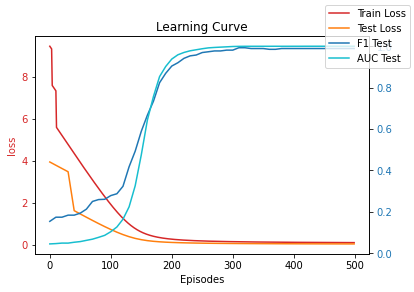

In [34]:
learning_curve(l_train_ep, l_test_ep, l_train, l_test, f1_test, auc_test)

F1 Score:

In [35]:
f1_score(predict(Xtest), Ytest)

0.9885931558935361

ROC:

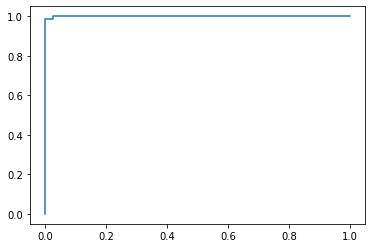

In [36]:
tpr, fpr = roc(predict(Xtest), Ytest)
plt.plot(fpr, tpr)

Área bajo la curva ROC:

In [37]:
auc_roc(predict(Xtest), Ytest)

0.9996114996114996

Prueba de 5 muestras del dataset de prueba:

In [38]:
samples = np.random.randint(0, Xtest.shape[0] ,5)
for i in samples:
    y_real = 'MALIGNO' if Ytest[i]==1.0 else 'BENIGNO'
    y_pred = 'MALIGNO' if h(Xtest[i])>0.5 else 'BENIGNO'
    print(f'El registro {i} es {y_real}, y fue predicho como {y_pred}')

El registro 86 es MALIGNO, y fue predicho como MALIGNO
El registro 163 es MALIGNO, y fue predicho como MALIGNO
El registro 131 es MALIGNO, y fue predicho como MALIGNO
El registro 67 es MALIGNO, y fue predicho como MALIGNO
El registro 170 es MALIGNO, y fue predicho como MALIGNO


### Entrenamiento con entradas lineales y al cuadrado

Entradas:

$$(x_0, x_1, ..., x_{30}, x_0^2, x_1^2, ..., x_{30}^2)$$

Nueva hipótesis:

In [39]:
class H2:
    def __init__(self, D):
        self.D = D
        self.W = np.random.rand(2*self.D)
        
    def __call__(self, x):
        x2 = np.hstack( (x, x**2) )
        z = np.sum( self.W * x )
        return 1/(1+np.exp(-z))
    
    def reset(self):
        self.W = np.random.rand(2*self.D)

In [40]:
h = H(D)

In [41]:
h.reset()
alpha = 0.01
num_episodes = 500
test_interval = 10

l_train = []
l_train_ep = []
l_test = []
f1_test = []
auc_test = []
l_test_ep = []

Entrenamiento

In [42]:
for i in range(num_episodes):
    # Descenso de gradiente
    h.W = h.W - alpha * calc_gradient(Xtrain, Ytrain)
    # Pérdida de entrenamiento
    loss = calc_loss(Xtrain, Ytrain)
    l_train.append(loss)
    l_train_ep.append(i)
    if i==0 or (i%test_interval)==0 or i==(num_episodes-1):
        # Pérdida en prueba
        l_test.append( calc_loss(Xtest, Ytest) )
        f1_test.append( f1_score(predict(Xtest), Ytest) )
        auc_test.append( auc_roc(predict(Xtest), Ytest) )
        l_test_ep.append(i)

/home/camilo/anaconda3/envs/vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Curva de entrenamiento:

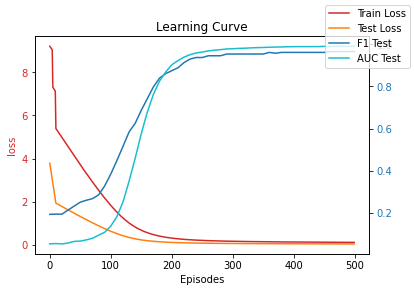

In [43]:
learning_curve(l_train_ep, l_test_ep, l_train, l_test, f1_test, auc_test)

F1 Score:

In [44]:
f1_score(predict(Xtest), Ytest)

0.9652509652509653

ROC:

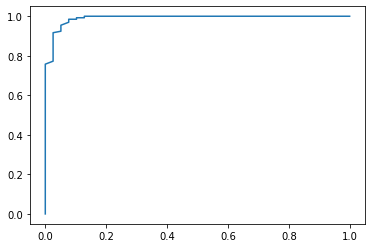

In [45]:
tpr, fpr = roc(predict(Xtest), Ytest)
plt.plot(fpr, tpr)

Área bajo la curva ROC:

In [46]:
auc_roc(predict(Xtest), Ytest)

0.9903846153846154

Prueba de 5 muestras del dataset de prueba:

In [47]:
samples = np.random.randint(0, Xtest.shape[0] ,5)
for i in samples:
    real = 'MALIGNO' if Ytest[i]==1.0 else 'BENIGNO'
    predict = 'MALIGNO' if h(Xtest[i])>0.5 else 'BENIGNO'
    print(f'El registro {i} es {real}, y fue predicho como {predict}')

El registro 75 es MALIGNO, y fue predicho como MALIGNO
El registro 26 es MALIGNO, y fue predicho como MALIGNO
El registro 79 es MALIGNO, y fue predicho como MALIGNO
El registro 99 es MALIGNO, y fue predicho como MALIGNO
El registro 48 es BENIGNO, y fue predicho como BENIGNO


In [48]:
h.W

array([ 4.28545314e-01,  1.59075687e-02,  5.42171788e-02, -3.89362677e-01,
       -3.06242406e-01, -1.28122964e-01, -2.42035152e-01, -3.63383569e-01,
       -1.60318861e-01, -1.62930281e-02, -1.44499145e-01,  1.24244091e-01,
        1.11052341e-01, -4.10974794e-01, -1.24279045e-01,  1.28136012e-01,
       -1.20247969e-01,  2.83078644e-01,  2.39766598e-01,  1.67560192e-01,
        9.23073582e-02, -4.94513987e-01, -2.24667715e-01, -7.28474678e-01,
       -2.96861168e-01, -8.76084803e-02, -6.36079537e-01,  6.75109234e-02,
       -2.97272499e-01,  5.61870196e-04,  1.99751483e-01])